Nama : Riza Aulia Hanifa

NIM : 2100015040

**Implementasi Decision Tree Regression dengan pengukuran performasi Scikit-learn untuk memprediksi Kebakaran Hutan**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
pip install --upgrade seaborn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

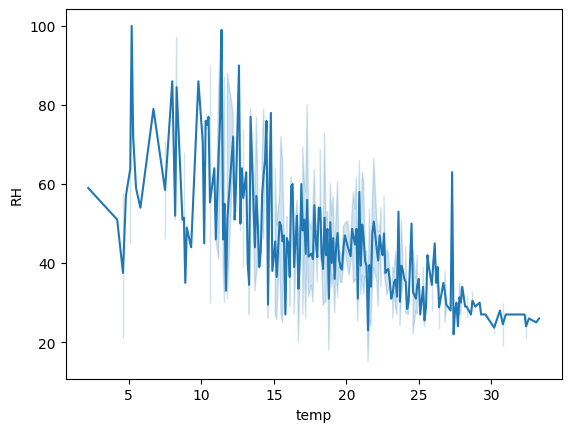

In [ ]:
sb.lineplot(x=df['temp'], y=df['RH'])
plt.show()

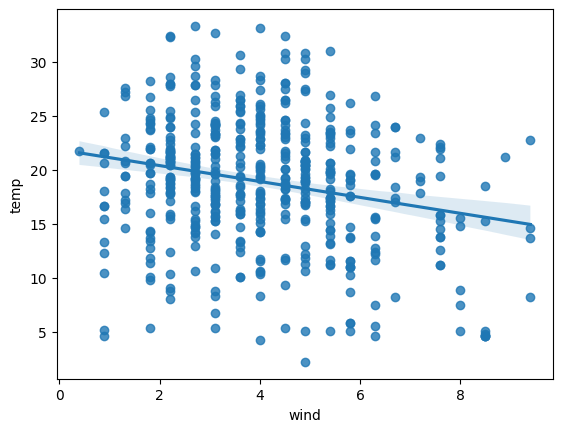

In [ ]:
sb.regplot(x='wind', y='temp', data=df)
plt.show()

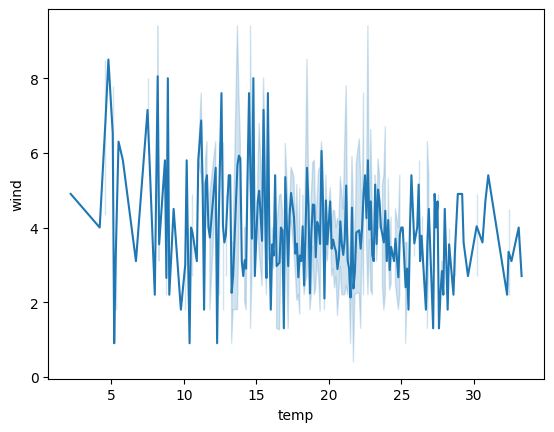

In [ ]:
sb.lineplot(x='temp', y='wind', data=df)
plt.show()

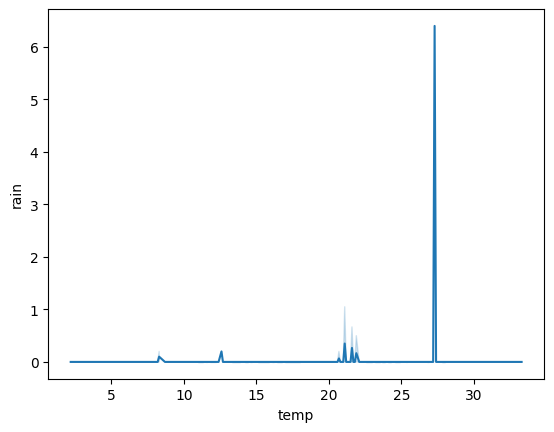

In [ ]:
sb.lineplot(x='temp', y='rain', data=df)
plt.show()

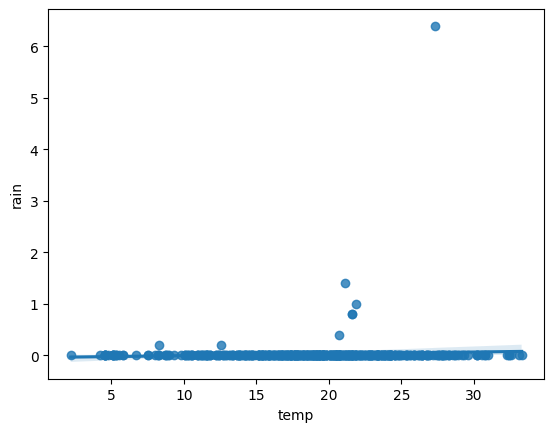

In [ ]:
sb.regplot(x='temp', y='rain', data=df)
plt.show()

Hapus data yang berjenis kategorial atau bukan data numerik yaitu bulan dan hari

In [ ]:
df.drop(columns=['month','day'], inplace=True)

In [ ]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


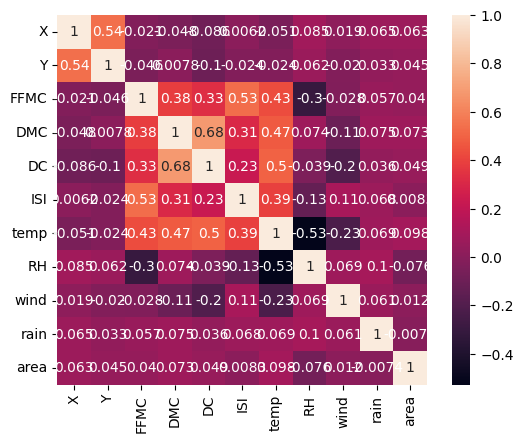

In [ ]:
corr = df.corr()
sb.heatmap(corr, square=True, annot=True)
plt.show()

Modeling

In [ ]:
X = df.loc[:, df.columns !='area'].values
y = df['area'].values

In [ ]:
X

array([[ 7. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 90.6, ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. , 94.4, ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 79.5, ..., 31. ,  4.5,  0. ]])

In [ ]:
X.shape

(517, 10)

In [ ]:
y = y.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('X_test', y_test.shape)

X_train (413, 10)
X_test (104, 10)
y_train (413, 1)
X_test (104, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])
y_train[:, :] = sc.fit_transform(y_train[:, :])
y_test[:, :] = sc.transform(y_test[:, :])

In [ ]:
X_train

array([[-0.69046229, -0.23274839, -0.02655293, ...,  0.66067453,
         0.77617805, -0.07126589],
       [-0.25905393, -1.0543303 , -0.06158922, ...,  1.14554095,
         0.49997477, -0.07126589],
       [-1.55327901, -0.23274839,  0.18366482, ...,  0.35763301,
         0.00280885, -0.07126589],
       ...,
       [ 1.03517115,  0.58883352,  0.32380998, ..., -0.24845002,
         0.00280885, -0.07126589],
       [-1.55327901, -0.23274839,  0.32380998, ..., -0.30905832,
        -0.99152299, -0.07126589],
       [-1.12187065, -1.87591221,  0.72672733, ..., -1.33939947,
         0.27901213, -0.07126589]])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

dtr = DecisionTreeRegressor(max_depth=6)
dtr.fit(X_train,np.ravel(y_train))
dtr_pred = dtr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE =', mse(dtr_pred, y_test))
print('MAE =', mae(dtr_pred, y_test))
print('R2 Score =', r2_score(dtr_pred, y_test))

MSE = 11.5764400757226
MAE = 0.8913239738740381
R2 Score = -1.134357315988173


Kesimpulan:

Hasil evaluasi model Decision Tree pada data mengindikasikan kinerja yang suboptimal. Dengan Mean Squared Error (MSE) sebesar 11.58, Mean Absolute Error (MAE) sebesar 0.89, dan R2 Score yang negatif (-1.13), model tersebut cenderung memiliki tingkat kesalahan yang tinggi dan tidak mampu memadukan data dengan baik. Perlu dilakukan analisis lebih lanjut untuk mengidentifikasi faktor-faktor yang mempengaruhi kinerja buruk model ini, mungkin melibatkan penyetelan parameter atau pertimbangan pemilihan model lain yang lebih cocok untuk karakteristik data tertentu.